In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
base_dir = "E:\\Purwadhika\\Porto 3\\"
path = base_dir + "bread basket.csv"
df = pd.read_csv(path)
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [36]:
df.describe()

,Transaction
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [60]:
df["Item"].nunique()


94

In [37]:
# Format Data Waktu 
df["date_time"] = pd.to_datetime(df["date_time"], format= '%d-%m-%Y %H:%M')

In [38]:
df["date_time"].dtype

dtype('<M8[ns]')

In [39]:
df["month"] = df["date_time"].dt.month
df["day"] = df["date_time"].dt.weekday
df["hour"] = df["date_time"].dt.hour

df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,day,hour
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,6,9
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,6,10
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,6,10


## **EDA**

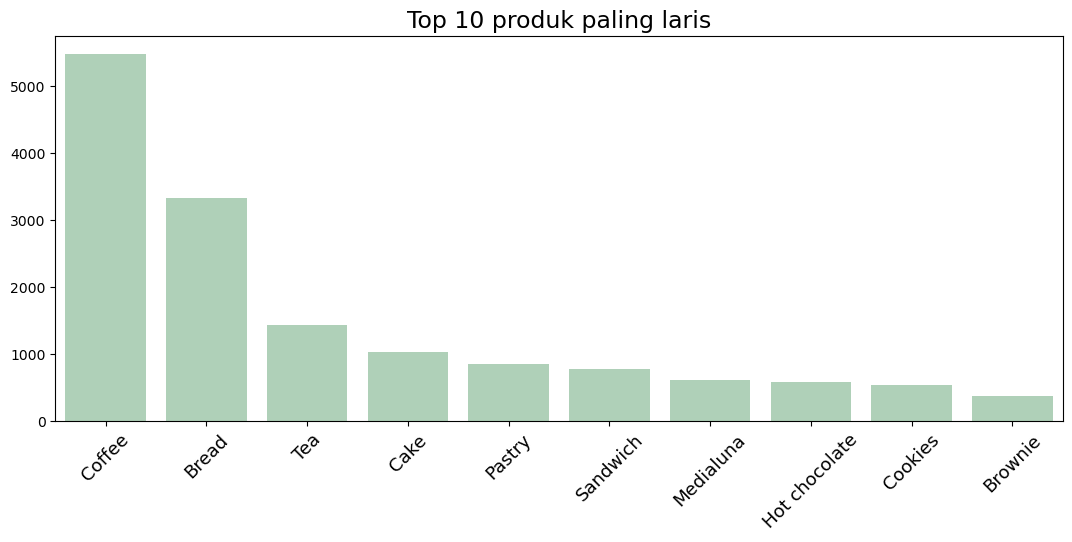

In [40]:
# Top 10 Item terlaris 

plt.figure(figsize=(13,5))
sns.set_palette ("coolwarm")

sns.barplot(x=df['Item'].value_counts()[:10].index,
            y = df["Item"]. value_counts()[:10].values,color= "#AAD5B6")
plt.xlabel(""); plt.ylabel("")
plt.xticks(size=13,rotation = 45)
plt.title("Top 10 produk paling laris", size=17)
plt.show()

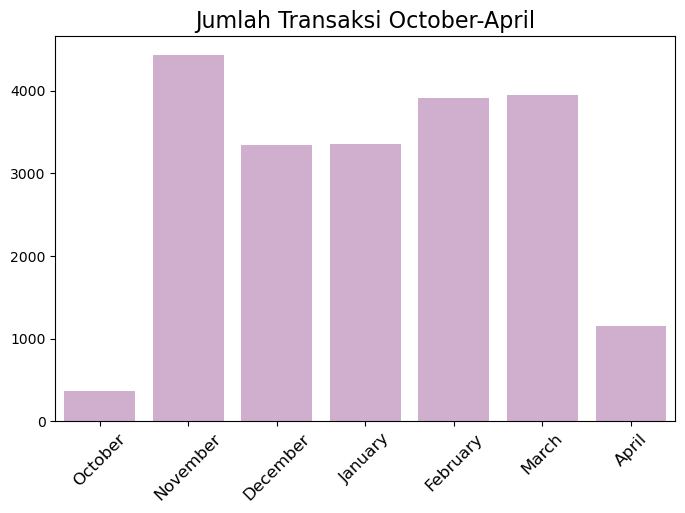

In [41]:
#Transaksi setiap bulan 

data_perbulan = df.groupby('month')['Transaction'].count()
data_perbulan = pd.concat([data_perbulan.iloc[4:],data_perbulan.iloc[:4]])

plt.figure(figsize=(8,5))
sns.set_palette ("coolwarm")
sns.barplot(
    x=["October","November", "December", "January", "February", "March", "April"],
    y= data_perbulan.values, color= "#D5AAD3"
)
plt.xticks(size=12, rotation=45)
plt.title("Jumlah Transaksi October-April", size=16)
plt.show()

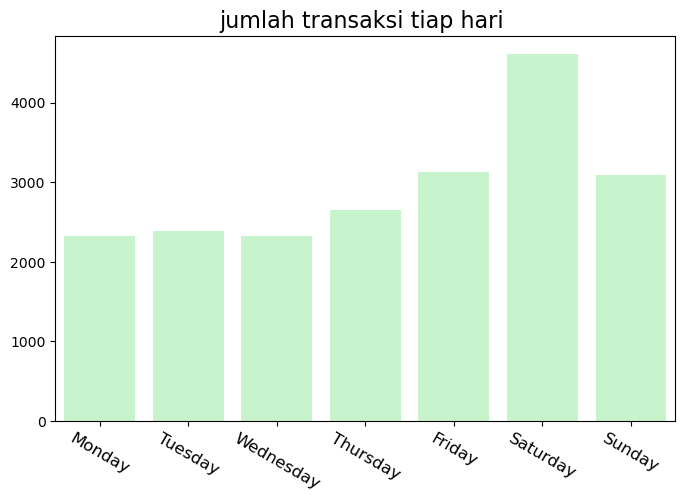

In [42]:
# transaksi per hari

data_perday = df.groupby('day')['Transaction'].count()

plt.figure(figsize=(8,5))
sns.barplot(
    x = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    y = data_perday.values, 
    color="#BFFCC6"
)
plt.xticks(size=12, rotation=-30)
plt.title("jumlah transaksi tiap hari ", size=16)
plt.show()

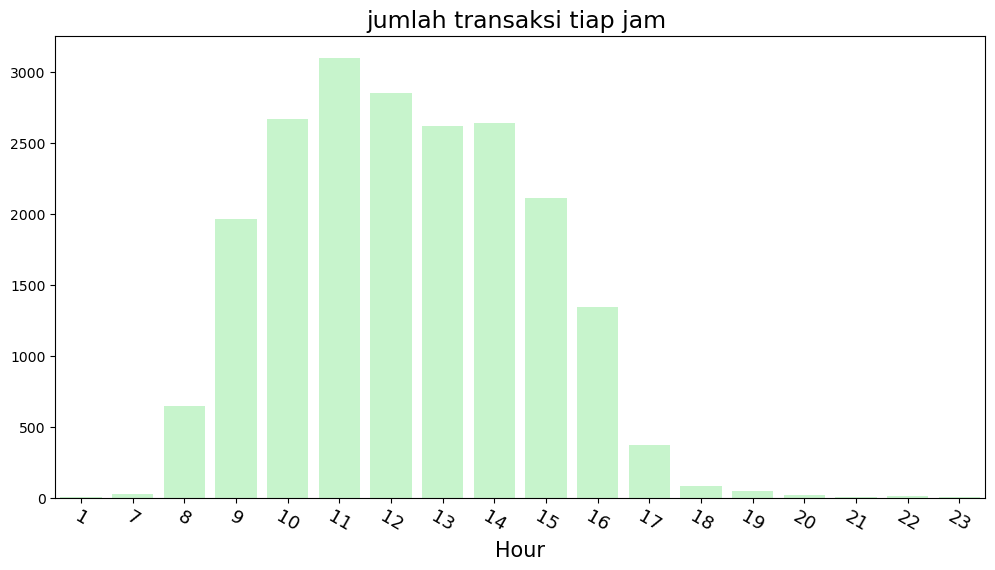

In [43]:
# Pembelian Tiap Jam 

# transaksi per hari

data_perhour = df.groupby('hour')['Transaction'].count()

plt.figure(figsize=(12,6))
sns.barplot(
    x = data_perhour.index,
    y = data_perhour.values, 
    color="#BFFCC6"
)

plt.xlabel("Hour", size=15)
plt.xticks(size=13, rotation=-30)
plt.title("jumlah transaksi tiap jam ", size=17)
plt.show()


## **Data Preparation**

In [44]:
df["Item"] = df["Item"].apply(lambda item: item.lower())

In [45]:
df["Item"] = df["Item"].apply(lambda item: item.strip())

In [46]:
df = df[["Transaction", "Item"]].copy()
df.head(15)

,Transaction,Item
0,1,bread
1,2,scandinavian
2,2,scandinavian
3,3,hot chocolate
4,3,jam
5,3,cookies
6,4,muffin
7,5,coffee
8,5,pastry
9,5,bread


In [47]:
import mlxtend
print(mlxtend.__version__)


0.23.4


In [48]:
from mlxtend.frequent_patterns import association_rules, apriori

In [49]:
item_count = df.groupby(["Transaction", "Item"])["Item"].count().reset_index(name="Count")
item_count.head(10)

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
5,4,muffin,1
6,5,bread,1
7,5,coffee,1
8,5,pastry,1
9,6,medialuna,1


In [50]:
item_count_pivot = item_count.pivot_table(index='Transaction', columns= "Item", values='Count', aggfunc="sum").fillna(0)
print('ukuran dataset :', item_count_pivot.shape)
item_count_pivot.head()

ukuran dataset : (9465, 94)


Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
item_count_pivot = item_count_pivot.astype("int32")
item_count_pivot.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
def encode(x):
    if x <= 0:
        return 0
    elif x >=1:
        return 1
item_count_pivot = item_count_pivot.applymap(encode)
item_count_pivot.head(15)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20076\2086669488.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  item_count_pivot = item_count_pivot.applymap(encode)


Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
print("ukuran dataset :", item_count_pivot.shape)
print("jumlah transaksi :", item_count_pivot.shape[0])
print("jumlah item :", item_count_pivot.shape[1])

ukuran dataset : (9465, 94)
jumlah transaksi : 9465
jumlah item : 94


In [54]:
support = 0.01 #1% 
frequent_items = apriori(item_count_pivot, min_support=support, use_colnames=True)
frequent_items.sort_values("support", ascending=False).head(10)

c:\Users\Lenovo\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
6,0.478394,(coffee)
2,0.327205,(bread)
26,0.142631,(tea)
4,0.103856,(cake)
34,0.090016,"(coffee, bread)"
19,0.086107,(pastry)
21,0.071844,(sandwich)
16,0.061807,(medialuna)
12,0.058320,(hot chocolate)
42,0.054728,"(cake, coffee)"


In [55]:
metric = "lift"
min_threshold = 1

rules = association_rules(frequent_items, metric=metric, min_threshold= min_threshold) [["antecedents","consequents","support","confidence","lift"]]
rules.sort_values('confidence', ascending=False, inplace=True)
rules.head(15)

,antecedents,consequents,support,confidence,lift
30,(toast),(coffee),0.023666,0.704403,1.472431
29,(spanish brunch),(coffee),0.010882,0.598837,1.251766
18,(medialuna),(coffee),0.035182,0.569231,1.189878
23,(pastry),(coffee),0.047544,0.552147,1.154168
0,(alfajores),(coffee),0.019651,0.540698,1.130235
17,(juice),(coffee),0.020602,0.534247,1.116750
25,(sandwich),(coffee),0.038246,0.532353,1.112792
6,(cake),(coffee),0.054728,0.526958,1.101515
26,(scone),(coffee),0.018067,0.522936,1.093107
13,(cookies),(coffee),0.028209,0.518447,1.083723
